### 필요한 라이브러리 불러오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1. 예제용 이미지 생성
Intersection Over Union(IoU)를 실습하기 위한 임의의 흑백 이미지를 생성합니다.


In [2]:
# 예제용 이진 마스크 정의
mask1 = np.zeros((100, 100), dtype=np.int32)
mask2 = np.zeros((100, 100), dtype=np.int32)

mask1[20:70, 20:70] = 1
mask2[40:90, 40:90] = 1

### 2. IoU 계산 함수 정의

- compute_iou 함수:
  - 역할: 두 개의 이진 마스크 배열 간의 IOU 값을 계산합니다.
  - 입력 인자:
    - mask1: 첫 번째 이진 마스크 배열.
    - mask2: 두 번째 이진 마스크 배열.
- 출력 값:
  - 계산된 IOU 값 (float).
- 작동 원리:
  - np.logical_and: 두 배열의 교집합을 구합니다.
  - np.logical_or: 두 배열의 합집합을 구합니다.
  - np.sum: 교집합과 합집합에서 True로 표시된 픽셀의 개수를 각각 구합니다.
  - 교집합 픽셀 수를 합집합 픽셀 수로 나누어 IOU 값을 계산합니다.


In [3]:
# IOU 계산 함수 정의
def compute_iou(mask1, mask2):
    # mask1, mask2의 교집합
    intersection = np.logical_and(mask1, mask2)
    # mask1, mask2의 합집합
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# IOU 계산
iou = compute_iou(mask1, mask2)
iou

0.21951219512195122

### 3. IoU 시각화

(참고) 함수설명,

- plt.subplot: 한 화면에 여러 그래프를 배치하기 위해 사용합니다.
  - (1, 3, 1): 한 줄에 3개의 그래프를 배치하고, 첫 번째 위치에 그래프를 표시합니다.
  - (1, 3, 2): 한 줄에 3개의 그래프를 배치하고, 두 번째 위치에 그래프를 표시합니다.
  - (1, 3, 3): 한 줄에 3개의 그래프를 배치하고, 세 번째 위치에 그래프를 표시합니다.
- plt.imshow: 각 마스크 배열을 이미지로 시각화합니다.
- plt.title: 각 그래프에 제목을 붙입니다.

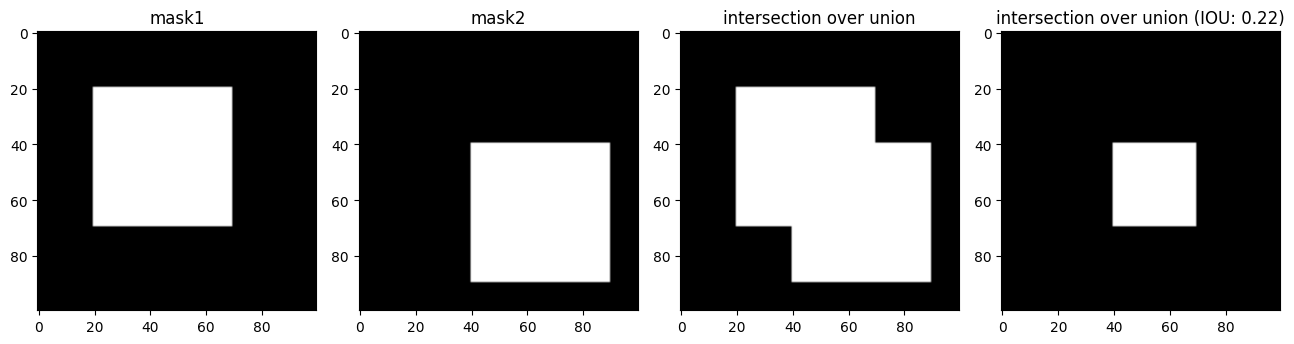

In [4]:
# 마스크와 IOU 시각화
plt.figure(figsize=(13, 5))

plt.subplot(1, 4, 1)
plt.imshow(mask1, cmap='gray')
plt.title('mask1')

plt.subplot(1, 4, 2)
plt.imshow(mask2, cmap='gray')
plt.title('mask2')

plt.subplot(1, 4, 3)
plt.imshow(np.logical_or(mask1, mask2), cmap='gray')
plt.title(f'intersection over union')

plt.subplot(1, 4, 4)
plt.imshow(np.logical_and(mask1, mask2), cmap='gray')
plt.title(f'intersection over union (IOU: {iou:.2f})')

plt.tight_layout()
plt.show()